<a href="https://colab.research.google.com/github/PabloNatB/Projects/blob/main/Distribucion_tiempos_de_absorcion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este código recibe una función a elección propia y genera números aleatorios a partir de dicha función y con eso se asigna al camimante aleatorio la propabilidad continua de dar un paso desde -1 a 1.
La única condición de la función es que sea positiva entre -1 y 1.

Primero importamos las librerías

In [ ]:
import random as rdm
import seaborn as sns #esta librería sirve para graficar
import numpy as np
from random import choices #Esta librería nos perimte escoger un elemento (o varios)
#de una lista en donde cada posicion tiene un peso estadístico (probabilidad) asignado en otra lista

Aquí generamos todos los puntos de nuestro espacio muestral, como necesitamos un número de aleatorio de -1 a 1 escogemos esos números como los extremos y dividimos entre 1000 para que aproxime el caso continuo

In [ ]:
population = np.linspace(-1,1,1000)


La función pesos toma una función cualquiera y la aplica a todo el espacio muestral y después la normaliza para que tengamos una lista de la misma longitud con los pesos asociados a cada posición de -1 a 1

In [ ]:
def pesos(funcion,poblacion):
  weights=np.array(funcion(poblacion))
  weights=weights/weights.sum()
  weights=list(weights)
  return weights

Esta función recibe el número máximo de iteraciones, la longitud del paso, el tamaño de la caja y la distribucióna a usar en los números "aleatorios".
Toma los números "aleatorios" y con eso hace el movimiento a un lado o el otro y cuando toca un lado de la caja rebota y cuando toca el otro rebota.
Esta función devuelve el tiempo que le tomó a la partícula ser absorbida, si nunca se absorbe entonces no devuelve nada.

In [ ]:
def caminante1d(N,delta,caja,distribution):
    x=[0] #iniciamos posición en 0
    population = np.linspace(-1,1,1000) #Creamos el las longitudes posibles de -1 a 1
    weights=pesos(distribution,population) # Creamos la lista con los pesos a cada posición
    random_num=choices(population, weights,k=N) #Generamos los números con la distribución elegida, el parámetro k es la cantidad de números generados
    for i in range(N-1):
        temp=random_num[i]
        #Condición de absorción
        if((x[i]+delta*temp)<-caja): #rebote
            x.append(x[i]-delta*temp)
        elif((x[i]+delta*temp)>caja): #absorción
            tiempo_absorcion=i
            x.append(caja)
            break
        else:
            x.append(x[i]+delta*temp)
    try:
      return tiempo_absorcion #regresamos el tiempo de absorción de la partícula
    except:
      pass


Aquí ponemos de ejemplo la función: $\sin^2 (x)$

In [ ]:
def sin2(x):
  return np.sin(x)**2

Ejecutamos la función de caminante1d 30k veces con N = 10000, delta = 0.25, tamaño de caja = 5 con la función $sin^2(x)$ y guardamos los tiempos de absorción.

In [ ]:
tiempos=[]
for i in range(30000):
    tiempos.append(caminante1d(10000,0.25,5,sin2))

Ploteamos los datos usando el argumento stat='density' para que normalice el área del histograma y nos da la densidad a cada punto.

[]

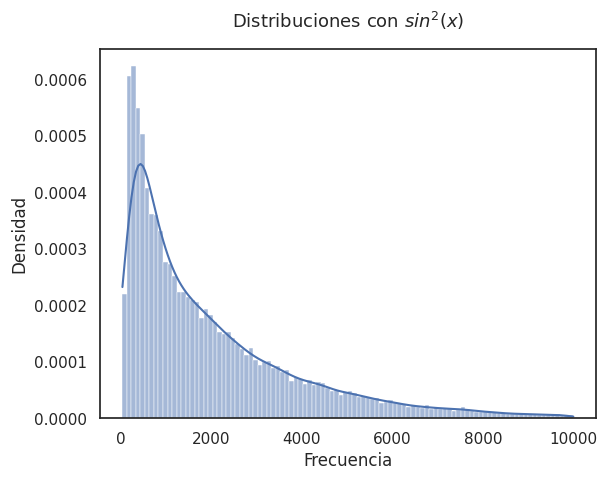

In [ ]:
sns.set(style='white')
ax=sns.histplot(x=tiempos, kde=True,stat='density',bins=100)
ax.set_title('Distribuciones con $sin^2(x)$', fontsize=13, pad=15);
ax.set(xlabel='Frecuencia', ylabel='Densidad');
ax.plot()

ploteamos el conteo de cada tiempo.

[]

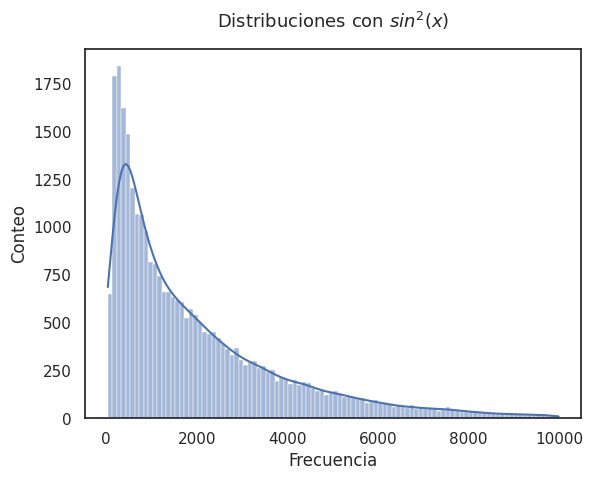

In [ ]:
sns.set(style='white')
ax=sns.histplot(x=tiempos, kde=True,bins=100)
ax.set_title('Distribuciones con $sin^2(x)$', fontsize=13, pad=15);
ax.set(xlabel='Frecuencia', ylabel='Conteo');
ax.plot()

Ahora repetimos con una función exponencial $e^x$

In [ ]:
def exp(x):
  return np.exp(x)

In [ ]:
tiempos=[]
for i in range(30000):
    tiempos.append(caminante1d(10000,0.25,5,exp))

[]

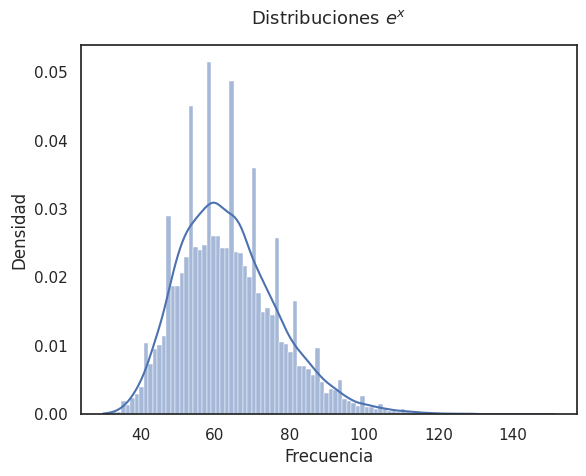

In [ ]:
sns.set(style='white')
ax=sns.histplot(x=tiempos, kde=True,stat='density',bins=100)
ax.set_title('Distribuciones $e^x$', fontsize=13, pad=15);
ax.set(xlabel='Frecuencia', ylabel='Densidad');
ax.plot()

[]

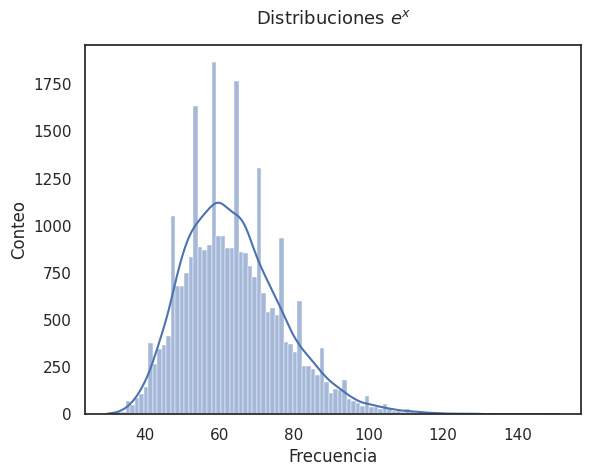

In [ ]:
sns.set(style='white')
ax=sns.histplot(x=tiempos, kde=True,bins=100)
ax.set_title('Distribuciones $e^x$', fontsize=13, pad=15);
ax.set(xlabel='Frecuencia', ylabel='Conteo');
ax.plot()

Ahora intentamos con una cuadrática $x^2$

In [ ]:
def cuadratica(x):
  return x**2

In [ ]:
tiempos=[]
for i in range(30000):
    tiempos.append(caminante1d(10000,0.25,5,cuadratica))

[]

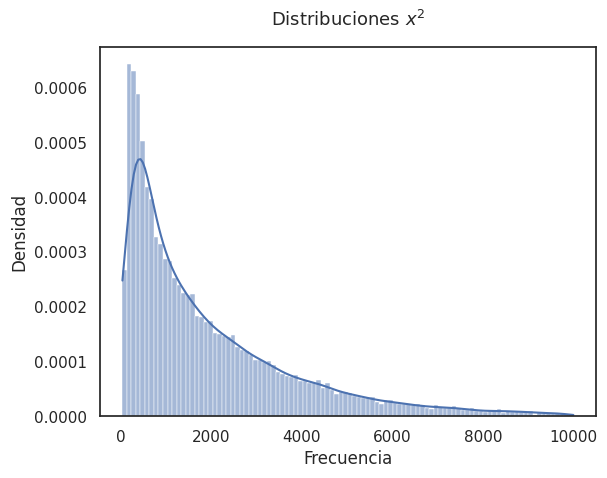

In [ ]:
sns.set(style='white')
ax=sns.histplot(x=tiempos, kde=True,stat='density',bins=100)
ax.set_title('Distribuciones $x^2$', fontsize=13, pad=15);
ax.set(xlabel='Frecuencia', ylabel='Densidad');
ax.plot()

[]

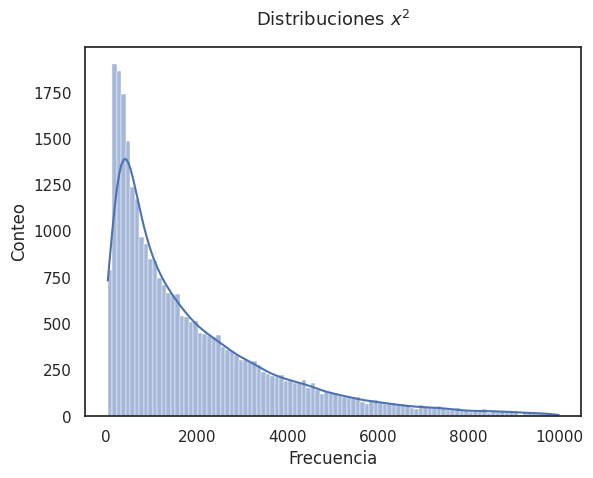

In [ ]:
sns.set(style='white')
ax=sns.histplot(x=tiempos, kde=True,bins=100)
ax.set_title('Distribuciones $x^2$', fontsize=13, pad=15);
ax.set(xlabel='Frecuencia', ylabel='Conteo');
ax.plot()

Función constante raíz $\sqrt{x+2}$

In [ ]:
def raiz(x):
  return np.sqrt(x+2)

In [ ]:
tiempos=[]
for i in range(30000):
    tiempos.append(caminante1d(10000,0.25,5,raiz))

[]

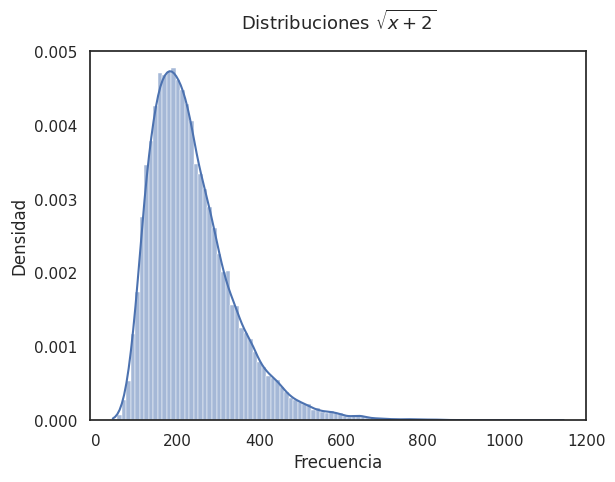

In [ ]:
sns.set(style='white')
ax=sns.histplot(x=tiempos, kde=True,stat='density',bins=100)
ax.set_title('Distribuciones $\sqrt{x+2}$', fontsize=13, pad=15);
ax.set(xlabel='Frecuencia', ylabel='Densidad');
ax.plot()

[]

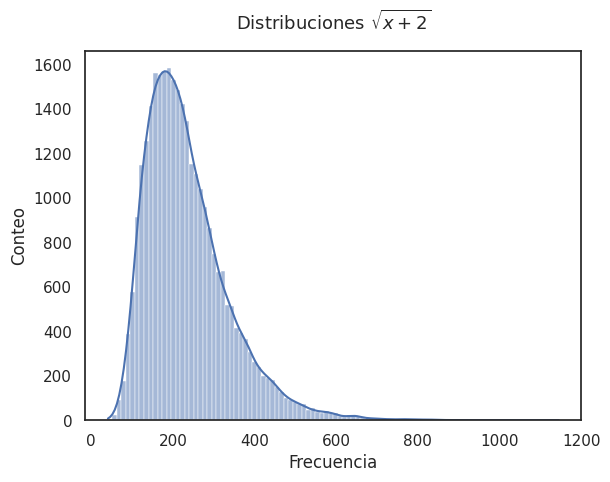

In [ ]:
sns.set(style='white')
ax=sns.histplot(x=tiempos, kde=True,bins=100)
ax.set_title('Distribuciones $\sqrt{x+2}$', fontsize=13, pad=15);
ax.set(xlabel='Frecuencia', ylabel='Conteo');
ax.plot()